In [15]:
#Importing the libraries that we will be using. 
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import osmnx as ox
import contextily as ctx 
import plotly.express as px

In [38]:
bblane=gpd.read_file('LA City Bikeways/Bikeways_(Existing).shp')
bblane.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    6375 non-null   int64   
 1   Network     3241 non-null   object  
 2   Bikeway     6375 non-null   object  
 3   Street      6363 non-null   object  
 4   From_       6321 non-null   object  
 5   To_         6317 non-null   object  
 6   Shape_Leng  6375 non-null   float64 
 7   Install_Da  6335 non-null   object  
 8   Region      5895 non-null   object  
 9   Bikeway_Ty  6375 non-null   object  
 10  Datasource  6375 non-null   object  
 11  geometry    6375 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(9)
memory usage: 597.8+ KB


<AxesSubplot:>

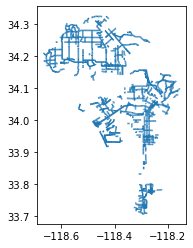

In [17]:
bblane.plot()

In [18]:
bblane.head()

,OBJECTID,Network,Bikeway,Street,From_,To_,Shape_Leng,Install_Da,Region,Bikeway_Ty,Datasource,geometry
0,1,None,Lane,Mateo St,6th St,4th Pl / Santa Fe Av,0.0,2019-03-01,None,Lane,2020-04-08,"LINESTRING Z (-118.23294 34.04017 0.00000, -11..."
1,2,None,Lane,Mateo St,6th St,4th Pl / Santa Fe Av,0.0,2019-03-01,None,Lane,2020-04-08,"LINESTRING Z (-118.23311 34.04119 0.00000, -11..."
2,3,None,Lane,Mateo St,6th St,4th Pl / Santa Fe Av,0.0,2019-03-01,None,Lane,2020-04-08,"LINESTRING Z (-118.23298 34.04045 0.00000, -11..."
3,4,None,Lane,Mateo St,6th St,4th Pl / Santa Fe Av,0.0,2019-03-01,None,Lane,2020-04-08,"LINESTRING Z (-118.23283 34.03920 0.00000, -11..."
4,5,None,Protected Bike Lane,Lomita Blvd,Eubank Av,Avalon Blvd,0.0,2019-04-26,None,Protected Bike Lane,2020-04-08,"LINESTRING Z (-118.25847 33.79945 0.00000, -11..."


In [26]:
bikeway_count=bblane.Bikeway.value_counts()
bikeway_count

Lane                            4461
Sharrowed Route                  923
Route                            704
Protected Bike Lane              152
Buffer Bike Lane                  69
Path                              48
Bicycle Friendly Street           11
Temp Removal Sharrowed Route       5
Detour Sharrowed Route             2
Name: Bikeway, dtype: int64

In [27]:
type(bikeway_count)

pandas.core.series.Series

In [28]:
df_bikeway_counts=pd.DataFrame(bikeway_count)
df_bikeway_counts

,Bikeway
Lane,4461
Sharrowed Route,923
Route,704
Protected Bike Lane,152
Buffer Bike Lane,69
Path,48
Bicycle Friendly Street,11
Temp Removal Sharrowed Route,5
Detour Sharrowed Route,2


In [33]:
df_bikeway_counts=df_bikeway_counts.reset_index()
df_bikeway_counts

,index,Bikeway
0,Lane,4461
1,Sharrowed Route,923
2,Route,704
3,Protected Bike Lane,152
4,Buffer Bike Lane,69
5,Path,48
6,Bicycle Friendly Street,11
7,Temp Removal Sharrowed Route,5
8,Detour Sharrowed Route,2


In [34]:
df_bikeway_counts.columns=['Bike Path Type', 'count']
df_bikeway_counts

,Bike Path Type,count
0,Lane,4461
1,Sharrowed Route,923
2,Route,704
3,Protected Bike Lane,152
4,Buffer Bike Lane,69
5,Path,48
6,Bicycle Friendly Street,11
7,Temp Removal Sharrowed Route,5
8,Detour Sharrowed Route,2


<AxesSubplot:ylabel='Bike Path Type'>

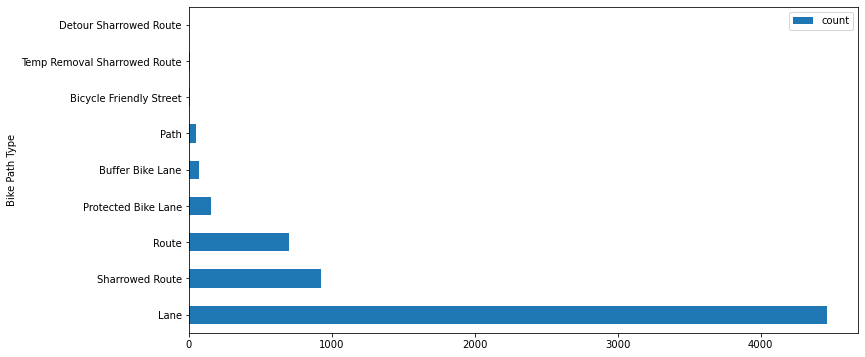

In [36]:
df_bikeway_counts.plot.barh(figsize=(12,6),
                            x='Bike Path Type')

In [40]:
bblane_sorted=bblane[['Bikeway_Ty','geometry']]

<AxesSubplot:>

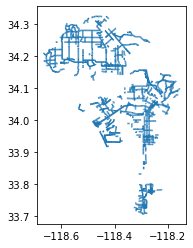

In [41]:
bblane_sorted.plot()

AttributeError: module 'matplotlib.pyplot' has no attribute 'addto'

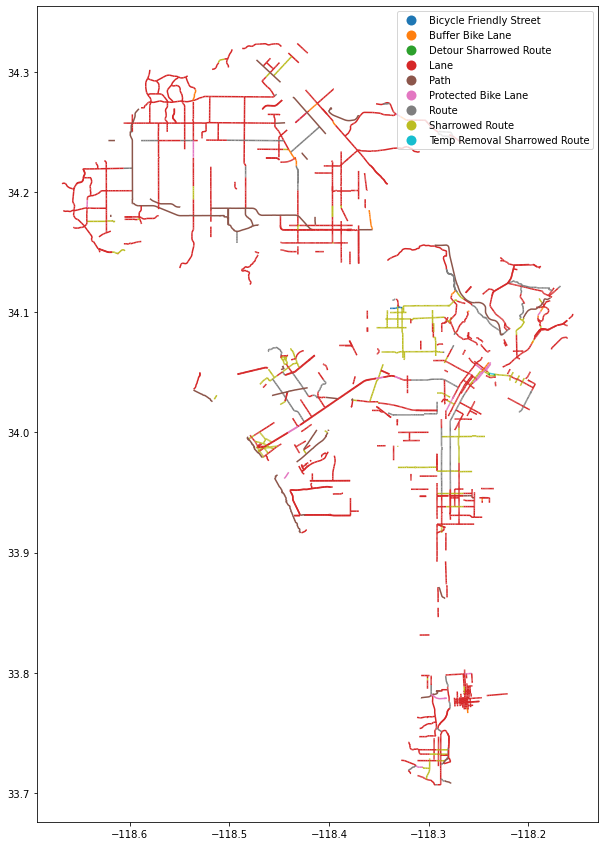

In [50]:
fig, ax=plt.subplots(figsize=(15,15))
bblane_sorted.plot(column='Bikeway_Ty',
                   categorical=True,
                   legend=True,
                   ax=ax)
plt.addto(map0)


TypeError: 'NoneType' object is not subscriptable